In [266]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score as accuracy
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import classification_report
from sklearn import metrics
import numpy as np
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from scipy.stats import randint
from sklearn.metrics import fbeta_score
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from pandas import set_option
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

The input file for analysis is available in github. Using the github URL, data set is imported. The data in the file is then converted to dataframe using pandas.
Run each cell one by to get the result.

In [267]:
url = "https://raw.githubusercontent.com/CE880-Gayathri/casestudydata/main/data_banknote_authentication.txt"
df = pd.read_csv(url)

Assigning column names for each Features and Targets.

In [268]:
df.columns = ["Variance", "Skewness", "Kurtosis", "Entropy", "output"]
x = df[['Variance', 'Skewness', 'Kurtosis', 'Entropy']]
y = df['output']

Total Count of each features

In [269]:
df.count()

Variance    1371
Skewness    1371
Kurtosis    1371
Entropy     1371
output      1371
dtype: int64

**Checking null values**

In [270]:
df.isnull().sum()

Variance    0
Skewness    0
Kurtosis    0
Entropy     0
output      0
dtype: int64

In [ ]:
df.head()

,Variance,Skewness,Kurtosis,Entropy,output
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [ ]:
x.head()

,Variance,Skewness,Kurtosis,Entropy
0,4.54590,8.1674,-2.4586,-1.46210
1,3.86600,-2.6383,1.9242,0.10645
2,3.45660,9.5228,-4.0112,-3.59440
3,0.32924,-4.4552,4.5718,-0.98880
4,4.36840,9.6718,-3.9606,-3.16250


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: output, dtype: int64

# Data Distribution

**Data distribution of Target**

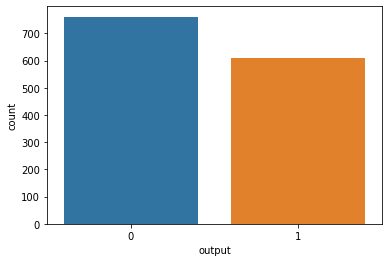

In [ ]:
sns.countplot(y)

Numbers of records 'Genuine' in Dataset:  761
Numbers of records 'Counterfeit' in Dataset:  610


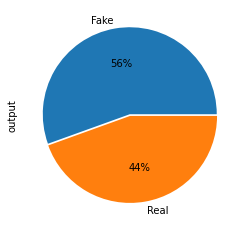

In [ ]:
real = len(df[df["output"] == 0])
fake = len(df[df["output"] == 1])
print("Numbers of records 'Genuine' in Dataset: ", real)
print("Numbers of records 'Counterfeit' in Dataset: ", fake)
labels = ["Fake", "Real"]
mycolors = ["hotpink","#4CAF50"]
y.value_counts().plot.pie(explode = [.01, .01], autopct = '%1.0f%%', labels = labels)
plt.show()
plt.close()

**Data distribution of Features**

In [ ]:
import plotly.express as px
figure = px.histogram(df, x='Variance', color='output', marginal='box', opacity=0.7, 
                        title=f"Distribution of input feature Variance")
figure.show()

In [ ]:
figure = px.histogram(df, x='Skewness', color='output', marginal='box', opacity=0.7, 
                        title=f"Distribution of input feature Skewness")
figure.show()

In [ ]:
figure = px.histogram(df, x='Kurtosis', color='output', marginal='box', opacity=0.7, 
                        title=f"Distribution of input feature Kurtosis")
figure.show()

In [ ]:
figure = px.histogram(df, x='Entropy', color='output', marginal='box', opacity=0.7, 
                        title=f"Distribution of input feature Entropy")
figure.show()

# Linearity

Linearity is relationship between each feature and target

1. **Variance**

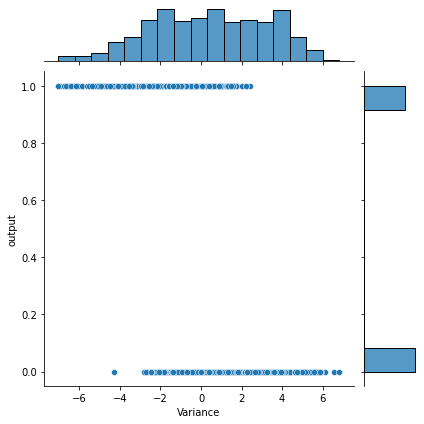

In [ ]:
sns.jointplot(df['Variance'],df['output'])

2. **Skewness**

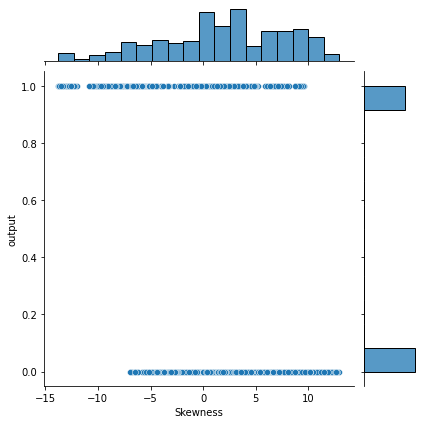

In [ ]:
sns.jointplot(df['Skewness'],df['output'])

3. **Kurtosis**

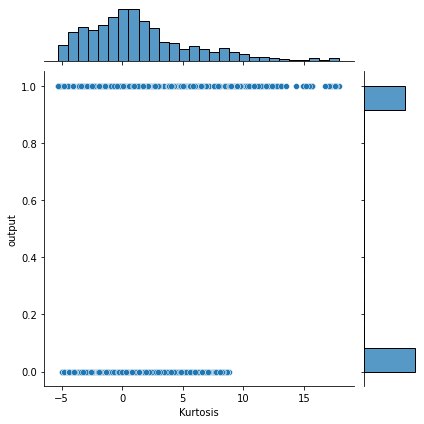

In [ ]:
sns.jointplot(df['Kurtosis'],df['output'])

4. **Entropy**

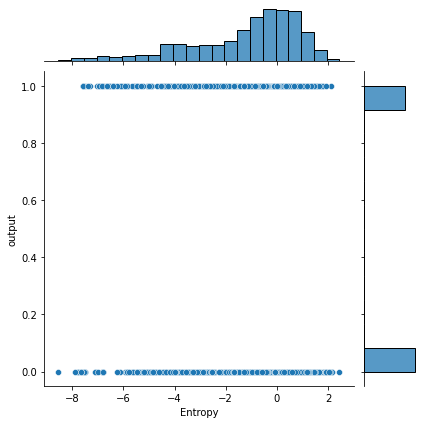

In [ ]:
sns.jointplot(df['Entropy'],df['output'])

# Balancing of Data set

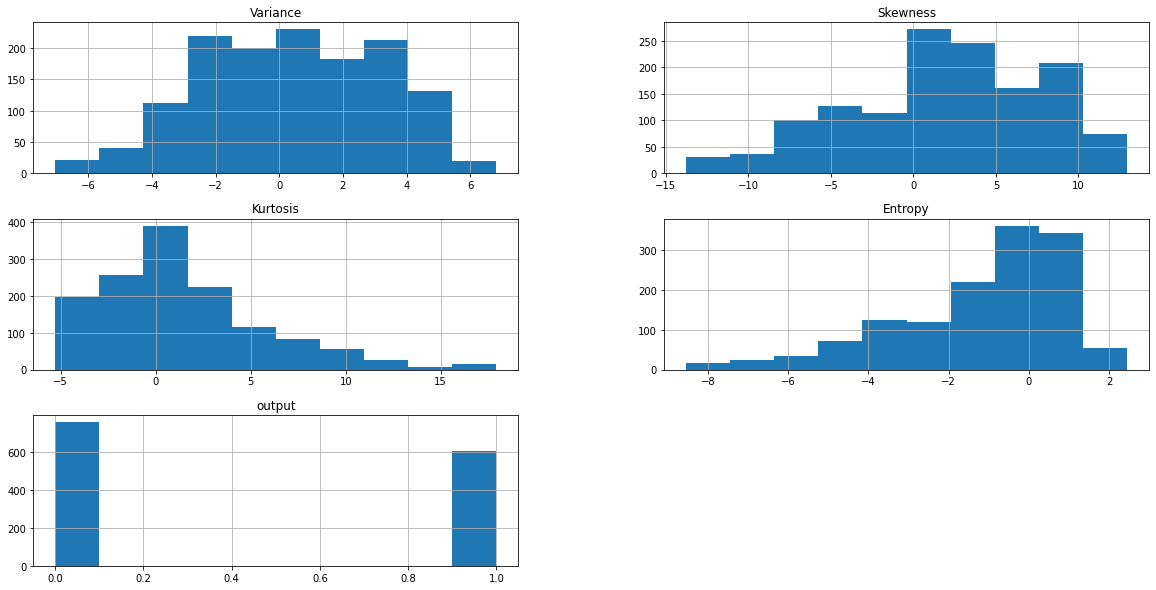

In [ ]:
df.hist(figsize=(20,10))
plt.show()

**Checking Outliers**

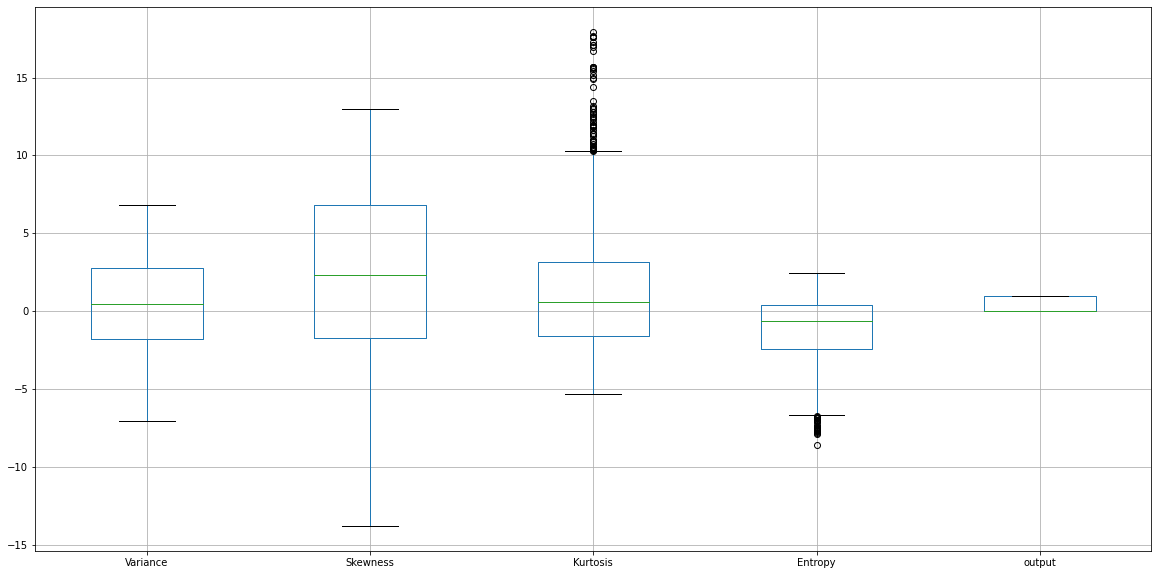

In [ ]:
df.boxplot(figsize=(20,10))

As distribution of Kurtosis and Entropy is showing non Gaussian probability distribution, we need to standadize the features to make it Gaussian probability distribution for getting accurate result. Also, above boxplot graphs depicts kurtosis and Entropy has outliers. So PowerTransformer is used for Kurtosis and Entropy and Standard Scalar is used for Variace and Skewness.

In [ ]:
std_scalar = StandardScaler()
x_std = pd.DataFrame(std_scalar.fit_transform(df[["Variance","Skewness"]]))

In [ ]:
power_trans = PowerTransformer()
x_pow_trans = pd.DataFrame(power_trans.fit_transform(df[["Kurtosis","Entropy"]]))

Concatenating the input columns after balancing

In [ ]:
x_data = pd.concat([x_std, x_pow_trans], axis=1, join='inner')
x_data.columns = ["Variance", "Skewness", "Kurtosis", "Entropy"]

In [ ]:
x_data.head()

,Variance,Skewness,Kurtosis,Entropy
0,1.448021,1.065417,-0.990894,-0.381623
1,1.208742,-0.776605,0.331250,0.493379
2,1.064661,1.296468,-1.650775,-1.146062
3,-0.035957,-1.086328,0.833932,-0.164043
4,1.385553,1.321868,-1.628233,-1.010899


From the below graph we can clearly says that after standardization all the features are having Gaussian probability distribution now.

In [ ]:
x_data.shape, y.shape

((1371, 4), (1371,))

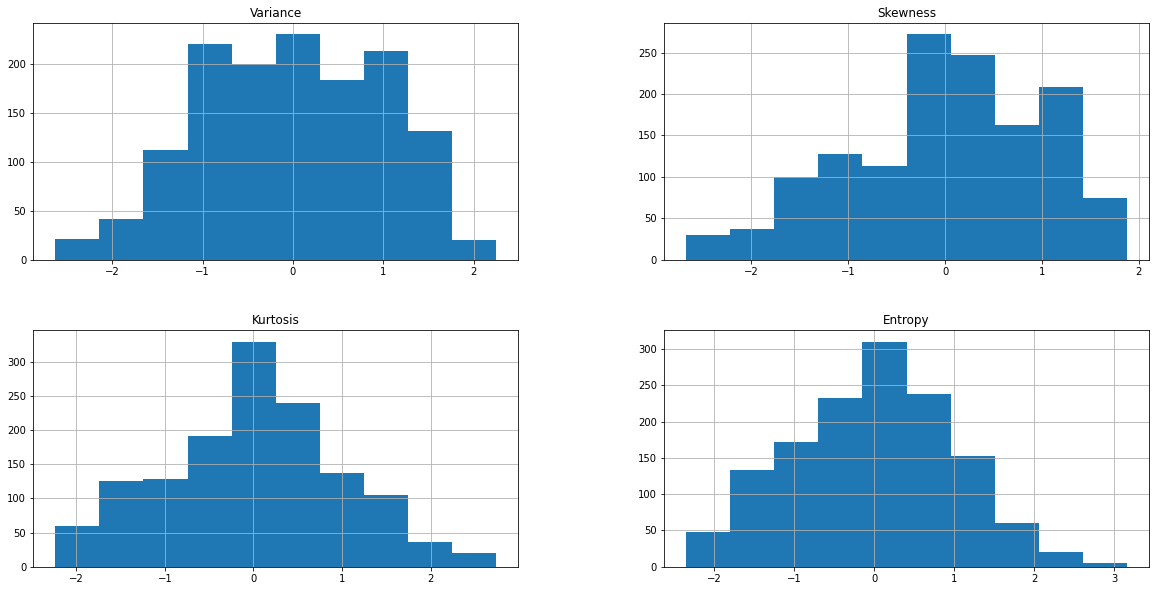

In [ ]:
x_data.hist(figsize=(20,10))
plt.show()

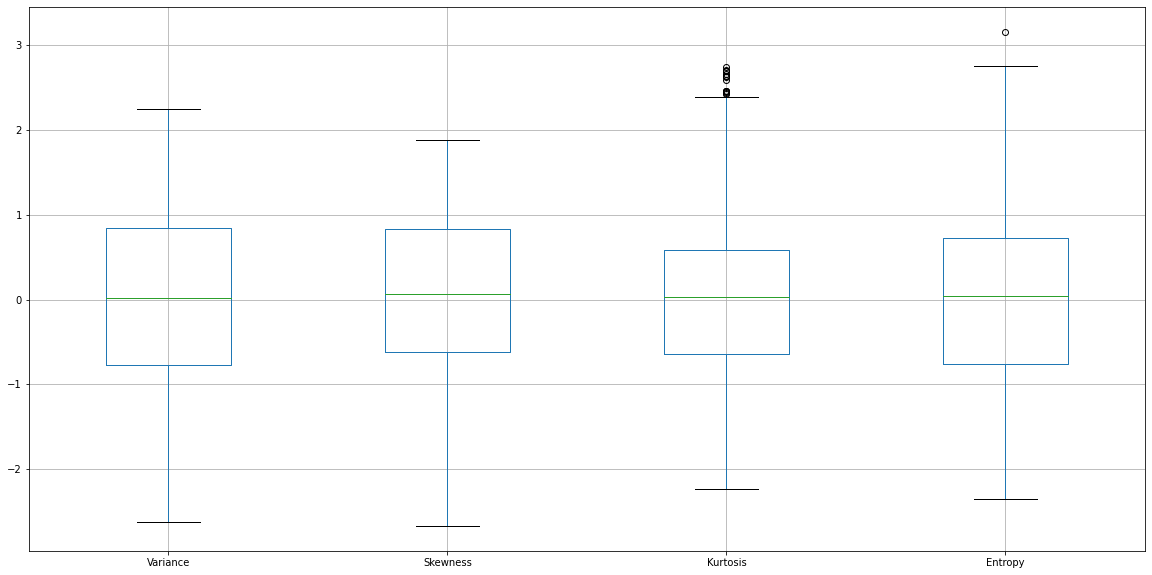

In [ ]:
x_data.boxplot(figsize=(20,10))

**Heatmap for checking corelation**

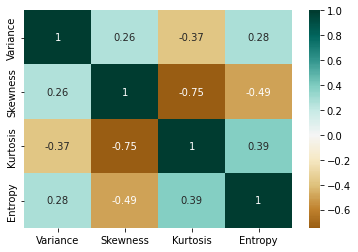

In [ ]:
sns.heatmap(x_data.corr(),cmap = 'BrBG', center=0, annot = True)

**Relation between each two features and the target**

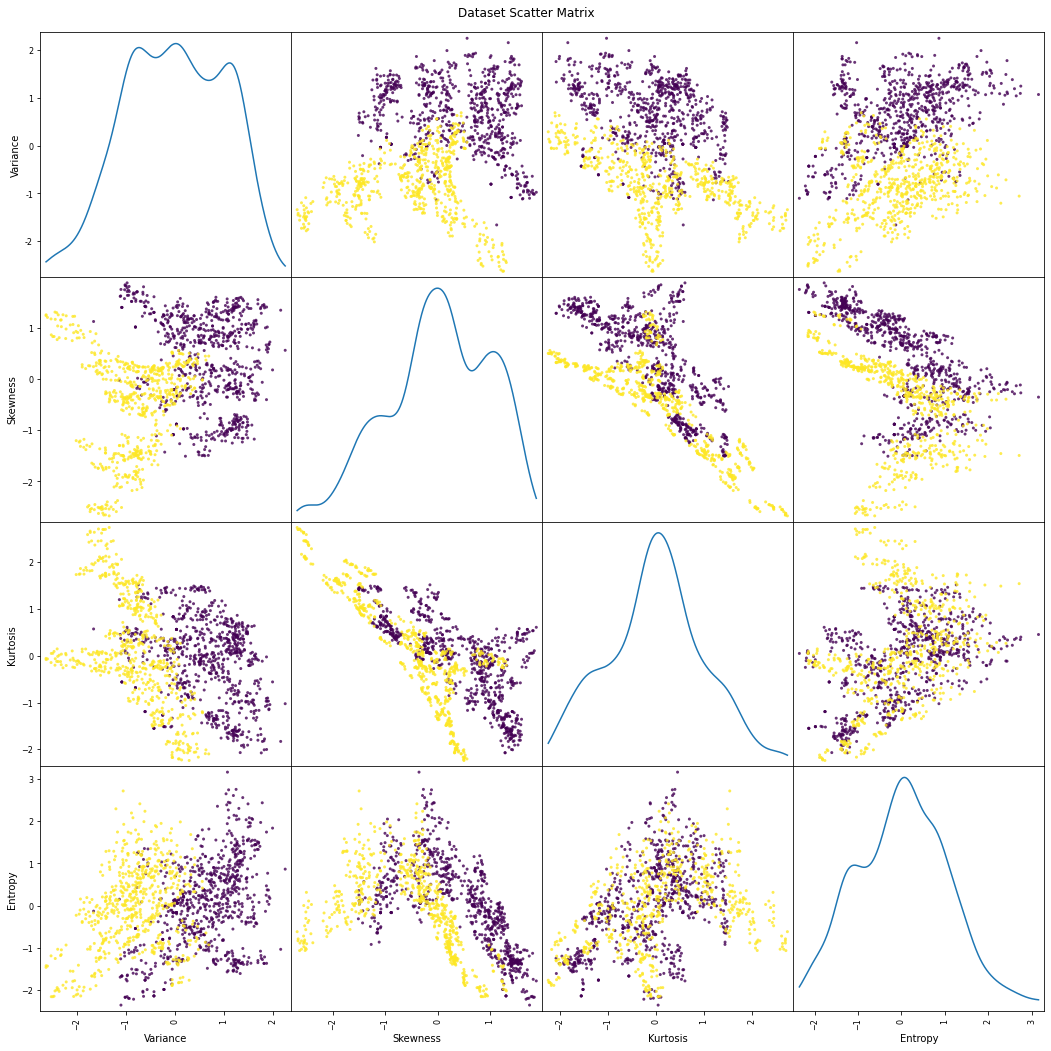

In [ ]:
pd.plotting.scatter_matrix(x_data, c = y, figsize = (18,18), diagonal = "kde", alpha = .8)
plt.suptitle("Dataset Scatter Matrix", y = .9)
plt.show()
plt.close()

#Splitting data set to training and test data

Data set splitted into train and test data. As grid search and cross validation is used for tuning and generalisation, splitting the data in to validation is not relevant.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.20, shuffle = True, random_state = 4)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (1096, 4)
y_train shape: (1096,)
X_test shape: (275, 4)
y_test shape: (275,)


# Hyperparameter Tuning

Parameter Initialization for each model

In [ ]:
param_dec_tree = { 'max_features': ['auto', 'sqrt', 'log2'],'ccp_alpha': [0.1, .01, .001], 'max_depth' : [5, 6, 7, 8, 9],'criterion' :['gini', 'entropy']}
param_svc = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear']}
param_rfc = {'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8], 'criterion' :['gini', 'entropy']}
param_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
param_knn = { 'n_neighbors' : [5,7,9,11,13,15], 'weights' : ['uniform','distance'], 'metric' : ['minkowski','euclidean','manhattan']}
param_lr = {"C":np.logspace(-3,3,7), "penalty":["l2"], "solver":['liblinear','newton-cg'], 'class_weight':[{ 0:0.95, 1:0.05 }, { 0:0.55, 1:0.45 }, { 0:0.45, 1:0.55 },{ 0:0.05, 1:0.95 }]}
param_xg = {'nthread':[4], 'objective':['binary:logistic'], 'learning_rate': [0.05], 'max_depth': [6], 'min_child_weight': [11], 'subsample': [0.8],'colsample_bytree': [0.7],'n_estimators': [5],'missing':[-999],'seed': [1337]}

Finding the best parameters using grid search

In [ ]:
grid_dc = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_dec_tree, cv=5, verbose=True)
grid_svc = GridSearchCV(SVC(probability=True), param_svc, cv=5)
grid_rfc = GridSearchCV(RandomForestClassifier(), param_rfc, cv=5)
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, verbose = 1, cv=5, n_jobs = -1)
grid_lr = GridSearchCV(LogisticRegression(), param_lr, scoring = 'accuracy', cv = 5, verbose=0)
grid_nb = GridSearchCV(GaussianNB(), param_nb, cv=5)
grid_xg = GridSearchCV(xgb.XGBClassifier(), param_xg, cv=5)

#Training models with best parameter obtained from grid search

1. Decision Tree

In [ ]:
grid_dc.fit(X_train, y_train)
grid_dc_best_param = grid_dc.best_params_
grid_dc_best_score = grid_dc.best_score_
ccp_alpha_value = grid_dc_best_param['ccp_alpha']
criterion_value = grid_dc_best_param['criterion']
max_depth_value = grid_dc_best_param['max_depth']
max_features_value = grid_dc_best_param['max_features']
dc_model = DecisionTreeClassifier(ccp_alpha = ccp_alpha_value, criterion = criterion_value, max_depth = max_depth_value, max_features= max_features_value)
dc_model.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


DecisionTreeClassifier(ccp_alpha=0.001, max_depth=8, max_features='log2')

2. Support Vector Machine

In [ ]:
grid_svc.fit(X_train, y_train)
grid_svc_best_param = grid_svc.best_params_
grid_svc_best_score = grid_svc.best_score_
C_value = grid_svc_best_param['C']
gamma_value = grid_svc_best_param['gamma']
kernal_value = grid_svc_best_param['kernel']
svc_model = SVC(probability=True, C = C_value, gamma = gamma_value, kernel = kernal_value)
svc_model.fit(X_train, y_train)

SVC(C=10, gamma=1, kernel='linear', probability=True)

3. Random Forest Classifier

In [ ]:
grid_rfc.fit(X_train, y_train)
grid_rfc_best_param = grid_rfc.best_params_
grid_rfc_best_score = grid_rfc.best_score_
criterion_value = grid_rfc_best_param['criterion']
max_depth_value = grid_rfc_best_param['max_depth']
max_features_value = grid_rfc_best_param['max_features']
n_estimators_value = grid_rfc_best_param['n_estimators']
rfc_model = RandomForestClassifier(criterion = criterion_value, max_depth = max_depth_value, max_features = max_features_value, n_estimators= n_estimators_value)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=500)

4. K Nearest Neighbor

In [ ]:
grid_knn.fit(X_train, y_train)
grid_knn_best_param = grid_knn.best_params_
grid_knn_best_score = grid_knn.best_score_
metric_value = grid_knn_best_param['metric']
n_neighbors_value = grid_knn_best_param['n_neighbors']
weights_value = grid_knn_best_param['weights']
knn_model = KNeighborsClassifier(metric = metric_value, n_neighbors = n_neighbors_value, weights = weights_value)
knn_model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


KNeighborsClassifier(weights='distance')

5. Logistic Regression

In [ ]:
grid_lr.fit(X_train, y_train)
grid_lr_best_param = grid_lr.best_params_
grid_lr_best_score = grid_lr.best_score_
C_value = grid_lr_best_param['C']
class_weight_value = grid_lr_best_param['class_weight']
penalty_value = grid_lr_best_param['penalty']
solver_value = grid_lr_best_param['solver']
lr_model = LogisticRegression(C = C_value, class_weight = class_weight_value ,penalty = penalty_value , solver= solver_value)
lr_model.fit(X_train, y_train)

LogisticRegression(C=100.0, class_weight={0: 0.55, 1: 0.45}, solver='liblinear')

6. Naive Bayes

In [ ]:
grid_nb.fit(X_train, y_train)
grid_nb_best_param = grid_nb.best_params_
grid_nb_best_score = grid_nb.best_score_
var_smoothing_value = grid_nb_best_param['var_smoothing']
nb_model = GaussianNB(var_smoothing = var_smoothing_value)
nb_model.fit(X_train, y_train)

GaussianNB(var_smoothing=0.0657933224657568)

7. XG Boost

In [ ]:
grid_xg.fit(X_train, y_train)
grid_xg_best_param = grid_xg.best_params_
grid_xg_best_score = grid_xg.best_score_
colsample_bytree_value = grid_xg_best_param['colsample_bytree']
learning_rate_value = grid_xg_best_param['learning_rate']
max_depth_value = grid_xg_best_param['max_depth']
min_child_weight_value = grid_xg_best_param['min_child_weight']
missing_value = grid_xg_best_param['missing']
n_estimators_value = grid_xg_best_param['n_estimators']
nthread_value = grid_xg_best_param['nthread']
objective_value = grid_xg_best_param['objective']
seed_value = grid_xg_best_param['seed']
subsample_value = grid_xg_best_param['subsample']
xg_model = xgb.XGBClassifier(colsample_bytree = colsample_bytree_value, learning_rate = learning_rate_value ,
                             max_depth = max_depth_value , min_child_weight= min_child_weight_value,
                             missing = missing_value ,n_estimators=n_estimators_value,
                             nthread=nthread_value,objective=objective_value,seed=seed_value,subsample=subsample_value)
xg_model.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.7, learning_rate=0.05, max_depth=6,
              min_child_weight=11, missing=-999, n_estimators=5, nthread=4,
              seed=1337, subsample=0.8)

Creating table contains best score and best parameters of each model after Grid Search

In [ ]:
tuning_data = [["Decision_tree", grid_dc_best_score, grid_dc_best_param], ["SVC", grid_svc_best_score, grid_svc_best_param], ["Random_Forest", grid_rfc_best_score, grid_rfc_best_param], ["KNN", grid_knn_best_score, grid_knn_best_param], ["Logistic_regression", grid_lr_best_score, grid_lr_best_param], ["Naive_Bayes", grid_nb_best_score, grid_nb_best_param], ["XG_Boost", grid_xg_best_score, grid_xg_best_param]]

In [274]:
print("Best Parameters and scores after Hyperparameter Tuning:")
pd.set_option('display.max_colwidth', 0)
param_df = pd.DataFrame(tuning_data, columns=["Model","Best_Score", "Best_Parameter"])
hp_tuning_df = param_df.style.set_properties(**{'text-align': 'left'})
hp_tuning_df = hp_tuning_df.set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])])
display(hp_tuning_df)

Best Parameters and scores after Hyperparameter Tuning:


,Model,Best_Score,Best_Parameter
0,Decision_tree,0.986310,"{'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}"
1,SVC,1.000000,"{'C': 10, 'gamma': 1, 'kernel': 'linear'}"
2,Random_Forest,0.994521,"{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 500}"
3,KNN,0.998174,"{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}"
4,Logistic_regression,1.000000,"{'C': 100.0, 'class_weight': {0: 0.55, 1: 0.45}, 'penalty': 'l2', 'solver': 'liblinear'}"
5,Naive_Bayes,0.847605,{'var_smoothing': 0.0657933224657568}
6,XG_Boost,0.925168,"{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 5, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'subsample': 0.8}"


#Cross validation

In [ ]:
class CrossValidation(object):
    def GetModel(self):
        Models = []
        Models.append(('Decision_Tree' , DecisionTreeClassifier()))
        Models.append(('SVM'  , SVC(probability=True)))
        Models.append(('Random_Forest'   , RandomForestClassifier()))
        Models.append(('KNN'  , KNeighborsClassifier()))
        Models.append(('Naive_Bayes'   , GaussianNB()))
        Models.append(('Logistic_Regression'   , LogisticRegression()))
        Models.append(('XG_Boost'  , GradientBoostingClassifier()))
        
        return Models
    
    def BasedLine2(self, X_train, y_train,basemodel):
    # Test options and evaluation metric
        num_folds = 10
        scoring_method = 'accuracy'

        _results = []
        _names = []
        for name, models in basemodel:
            k_fold = StratifiedKFold(n_splits=num_folds, random_state= np.random.seed())
            cvresults = cross_val_score(models, X_train, y_train, cv=k_fold, scoring=scoring_method)
            _results.append(cvresults)
            _names.append(name)
            message = "%s: %f (%f)" % (name, cvresults.mean(), cvresults.std())
            print(message)

        return _names, _results
    
    def ScoreDF(_names,_results):
        def floatingDecimals(f_val, dec=3):
            prc = "{:."+str(dec)+"f}" 

            return float(prc.format(f_val))
        mean_score = []
        score = []
        for r in _results:
            mean_score.append(floatingDecimals(r.mean(),4))
            score.append(r)
        pd.set_option('display.max_colwidth', 0)
        df = pd.DataFrame({'Model':_names,'Cross_Validation_Score': score, 'Mean_Score': mean_score})
        scoreDF = df.style.set_properties(**{'text-align': 'left'})
        scoreDF = scoreDF.set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])])
        return scoreDF

In [ ]:
models = CrossValidation().GetModel()
print(X_train.shape)
print(y_train.shape)

(1096, 4)
(1096,)


In [ ]:
_names,_results = CrossValidation().BasedLine2(X_train, y_train,models)

Decision_Tree: 0.984454 (0.010896)
SVM: 1.000000 (0.000000)
Random_Forest: 0.993620 (0.007107)
KNN: 0.997273 (0.005821)
Naive_Bayes: 0.846672 (0.039601)
Logistic_Regression: 0.997264 (0.005830)
XG_Boost: 0.991802 (0.010327)


In [ ]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))
        py.iplot(data)

From the below graph we can says SVM has better performance than other models.

In [ ]:
PlotBoxR().PlotResult(_names,_results)

**Cross Validation Scores and Average Scores**

In [ ]:
basedLineScore = CrossValidation.ScoreDF(_names,_results)
basedLineScore

,Model,Cross_Validation_Score,Mean_Score
0,Decision_Tree,[1. 0.99090909 1. 0.99090909 0.98181818 0.98181818 0.98165138 0.96330275 0.98165138 0.97247706],0.984500
1,SVM,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],1.000000
2,Random_Forest,[1. 1. 0.99090909 1. 0.98181818 0.98181818 1. 0.99082569 0.99082569 1. ],0.993600
3,KNN,[1. 1. 1. 0.99090909 1. 0.98181818 1. 1. 1. 1. ],0.997300
4,Naive_Bayes,[0.86363636 0.88181818 0.80909091 0.84545455 0.85454545 0.87272727 0.85321101 0.76146789 0.81651376 0.90825688],0.846700
5,Logistic_Regression,[1. 1. 1. 0.98181818 1. 1. 1. 0.99082569 1. 1. ],0.997300
6,XG_Boost,[1. 1. 0.99090909 1. 0.97272727 0.97272727 1. 0.99082569 0.99082569 1. ],0.991800


# Class with defenitions of functions for all the the Evaluation Matrix scores and Curves.

In [ ]:
class Scores():
  def evaluation_matrices(self, y_test, y_pred,model):
    acc = metrics.accuracy_score(y_test, y_pred)
    avg_prec = metrics.average_precision_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    fbeta = metrics.fbeta_score(y_test, y_pred,beta = 0.5)
    prec =metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    roc_auc = metrics.roc_auc_score(y_test, y_pred)
    return [model,acc, avg_prec, f1, fbeta, prec, rec, roc_auc ]

  def get_auc_scores(self, clf, X_train, X_test, y_train, y_test):
    y_train_score = clf.predict_proba(X_train)[:, 1]
    y_test_score = clf.predict_proba(X_test)[:, 1]
    auc_train = roc_auc_score(y_train, y_train_score)
    auc_test = roc_auc_score(y_test, y_test_score)
    return y_test_score

  def display_confusion_matrix(self):
    classifiers = [dc_model, 
               svc_model,
               rfc_model,
               nb_model,
               knn_model,
               lr_model,
               xg_model]
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16,6))
    axes[1, 3].set_axis_off()
    for cls, ax in zip(classifiers, axes.flatten()):
        plot_confusion_matrix(cls, 
                              X_test, 
                              y_test, 
                              ax=ax, 
                              cmap='Blues',
                             display_labels = ['Fake', 'Original'])
        ax.title.set_text(type(cls).__name__)
    plt.tight_layout()  
    plt.show()

  def roc_auc_curve(self):
    ytest_dc_score = Scores().get_auc_scores(dc_model, X_train, X_test, y_train, y_test)
    ytest_svc_score = Scores().get_auc_scores(svc_model, X_train, X_test, y_train, y_test)
    ytest_rfc_score = Scores().get_auc_scores(rfc_model, X_train, X_test, y_train, y_test)
    ytest_knn_score = Scores().get_auc_scores(knn_model, X_train, X_test, y_train, y_test)
    ytest_nb_score = Scores().get_auc_scores(nb_model, X_train, X_test, y_train, y_test)
    ytest_lr_score = Scores().get_auc_scores(lr_model, X_train, X_test, y_train, y_test)
    ytest_xg_score = Scores().get_auc_scores(xg_model, X_train, X_test, y_train, y_test)
    roc_curve_setup = [ytest_dc_score, 
               ytest_svc_score,
               ytest_rfc_score,
               ytest_knn_score,
               ytest_nb_score,
               ytest_lr_score,
               ytest_xg_score]
    figure, axis = plt.subplots(4, 2, figsize=(9,9))
    axis[3, 1].set_axis_off()
    fpr_dc, tpr_dc, _ = roc_curve(y_test, ytest_dc_score)
    fpr_svc, tpr_svc, _ = roc_curve(y_test, ytest_svc_score)
    fpr_rfc, tpr_rfc, _ = roc_curve(y_test, ytest_rfc_score)
    fpr_knn, tpr_knn, _ = roc_curve(y_test, ytest_knn_score)
    fpr_nb, tpr_nb, _ = roc_curve(y_test, ytest_nb_score)
    fpr_lr, tpr_lr, _ = roc_curve(y_test, ytest_lr_score)
    fpr_xg, tpr_xg, _ = roc_curve(y_test, ytest_xg_score)
    roc_auc_dc = auc(fpr_dc, tpr_dc)
    roc_auc_svc = auc(fpr_svc, tpr_svc)
    roc_auc_rfc = auc(fpr_rfc, tpr_rfc)
    roc_auc_knn = auc(fpr_knn, tpr_knn)
    roc_auc_nb = auc(fpr_nb, tpr_nb)
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    roc_auc_xg = auc(fpr_xg, tpr_xg)
    axis[0, 0].plot(fpr_dc, tpr_dc)
    axis[0, 0].plot([0, 1], [0, 1])
    axis[0, 0].set_title("Decisison Tree - ROC curve (area = %0.2f)" % roc_auc_dc)
    axis[0, 0].set_xlabel("False Positive Rate")
    axis[0, 0].set_ylabel("True Positive Rate")
    axis[0, 1].plot(fpr_svc, tpr_svc)
    axis[0, 1].plot([0, 1], [0, 1])
    axis[0, 1].set_title("Support Vector - ROC curve (area = %0.2f)" % roc_auc_svc)
    axis[0, 1].set_xlabel("False Positive Rate")
    axis[0, 1].set_ylabel("True Positive Rate")
    axis[1, 0].plot(fpr_rfc, tpr_rfc)
    axis[1, 0].plot([0, 1], [0, 1])
    axis[1, 0].set_title("Random Forest - ROC curve (area = %0.2f)" % roc_auc_rfc)
    axis[1, 0].set_xlabel("False Positive Rate")
    axis[1, 0].set_ylabel("True Positive Rate")
    axis[1, 1].plot(fpr_knn, tpr_knn)
    axis[1, 1].plot([0, 1], [0, 1])
    axis[1, 1].set_title("KNN - ROC curve (area = %0.2f)" % roc_auc_knn)
    axis[1, 1].set_xlabel("False Positive Rate")
    axis[1, 1].set_ylabel("True Positive Rate")
    axis[2, 0].plot(fpr_nb, tpr_nb)
    axis[2, 0].plot([0, 1], [0, 1])
    axis[2, 0].set_title("Naive Bayes - ROC curve (area = %0.2f)" % roc_auc_nb)
    axis[2, 0].set_xlabel("False Positive Rate")
    axis[2, 0].set_ylabel("True Positive Rate")
    axis[2, 1].plot(fpr_lr, tpr_lr)
    axis[2, 1].plot([0, 1], [0, 1])
    axis[2, 1].set_title("Logistic Regression - ROC curve (area = %0.2f)" % roc_auc_lr)
    axis[2, 1].set_xlabel("False Positive Rate")
    axis[2, 1].set_ylabel("True Positive Rate")
    axis[3, 0].plot(fpr_xg, tpr_xg)
    axis[3, 0].plot([0, 1], [0, 1])
    axis[3, 0].set_title("XG Boost - ROC curve (area = %0.2f)" % roc_auc_xg)
    axis[3, 0].set_xlabel("False Positive Rate")
    axis[3, 0].set_ylabel("True Positive Rate")
    plt.tight_layout()  
    plt.show()

# Model Evaluation using Test Data

Predicting the target value of input test data

In [ ]:
y_predict_dc = dc_model.predict(X_test)
y_predict_svc = svc_model.predict(X_test)
y_predict_rfc = rfc_model.predict(X_test)
y_predict_knn = knn_model.predict(X_test)
y_predict_nb = nb_model.predict(X_test)
y_predict_lr = lr_model.predict(X_test)
y_predict_xg = xg_model.predict(X_test)

Evaluation matrix score calculation.

In [ ]:
y_pred_dc = Scores().evaluation_matrices(y_test, y_predict_dc, "Decision_tree") 
y_pred_svc = Scores().evaluation_matrices(y_test, y_predict_svc, "SVC") 
y_pred_rfc = Scores().evaluation_matrices(y_test, y_predict_rfc, "Random_Forest") 
y_pred_knn = Scores().evaluation_matrices(y_test, y_predict_knn, "KNN") 
y_pred_nb = Scores().evaluation_matrices(y_test, y_predict_nb, "Naive_Bayes") 
y_pred_lr = Scores().evaluation_matrices(y_test, y_predict_lr, "Logistic_Regression") 
y_pred_xg = Scores().evaluation_matrices(y_test, y_predict_xg, "XG_Boost") 

In [ ]:
ev_matrix_data = [[y_pred_dc[0], y_pred_dc[1], y_pred_dc[2], y_pred_dc[3], y_pred_dc[4], y_pred_dc[5],y_pred_dc[6], y_pred_dc[7]], [y_pred_svc[0], y_pred_svc[1], y_pred_svc[2], y_pred_svc[3],y_pred_svc[4], y_pred_svc[5], y_pred_svc[6], y_pred_svc[7]], [y_pred_rfc[0], y_pred_rfc[1], y_pred_rfc[2], y_pred_rfc[3], y_pred_rfc[4], y_pred_rfc[5], y_pred_rfc[6], y_pred_rfc[7]], [y_pred_knn[0], y_pred_knn[1], y_pred_knn[2], y_pred_knn[3], y_pred_knn[4], y_pred_knn[5], y_pred_knn[6], y_pred_knn[7]], [y_pred_nb[0], y_pred_nb[1],y_pred_nb[2],y_pred_nb[3],y_pred_nb[4],y_pred_nb[5],y_pred_nb[6], y_pred_nb[7]], [y_pred_lr[0], y_pred_lr[1], y_pred_lr[2], y_pred_lr[3], y_pred_lr[4], y_pred_lr[5], y_pred_lr[6], y_pred_lr[7]], [y_pred_xg[0], y_pred_xg[1], y_pred_xg[2], y_pred_xg[3], y_pred_xg[4], y_pred_xg[5], y_pred_xg[6], y_pred_xg[7]]]

#Evaluation Matrix Scores

In [ ]:
print("Evaluation matrix scores for each models")
pd.DataFrame(ev_matrix_data, columns=["Model name", "Accuracy Score", "Average precision Score", "F1 Score", "F Beta Score", "Precision Score", "Recall Score", "ROC AUC Score"])

Evaluation matrix scores for each models


,Model name,Accuracy Score,Average precision Score,F1 Score,F Beta Score,Precision Score,Recall Score,ROC AUC Score
0,Decision_tree,0.981818,0.962041,0.978903,0.971524,0.966667,0.991453,0.983068
1,SVC,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Random_Forest,0.981818,0.962041,0.978903,0.971524,0.966667,0.991453,0.983068
3,KNN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,Naive_Bayes,0.832727,0.733326,0.796460,0.813743,0.825688,0.769231,0.824489
5,Logistic_Regression,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,XG_Boost,0.909091,0.844208,0.892704,0.895009,0.896552,0.888889,0.906470


# Classification Report of all Models

In [ ]:
print("Classification Report - Decision Tree")
print(classification_report(y_test, y_predict_dc, target_names = ['Fake', 'Original'])) 
print("Classification Report - SVM")
print(classification_report(y_test, y_predict_svc, target_names = ['Fake', 'Original'])) 
print("Classification Report - Random Forest")
print(classification_report(y_test, y_predict_rfc, target_names = ['Fake', 'Original'])) 
print("Classification Report - KNN")
print(classification_report(y_test, y_predict_knn, target_names = ['Fake', 'Original'])) 
print("Classification Report - Naive Bayes")
print(classification_report(y_test, y_predict_nb, target_names = ['Fake', 'Original'])) 
print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_predict_lr, target_names = ['Fake', 'Original'])) 
print("Classification Report - XG Boost")
print(classification_report(y_test, y_predict_xg, target_names = ['Fake', 'Original'])) 

Classification Report - Decision Tree
              precision    recall  f1-score   support

        Fake       0.99      0.97      0.98       158
    Original       0.97      0.99      0.98       117

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275

Classification Report - SVM
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00       158
    Original       1.00      1.00      1.00       117

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

Classification Report - Random Forest
              precision    recall  f1-score   support

        Fake       0.99      0.97      0.98       158
    Original       0.97      0.99      0.98       117

    accuracy                           0.98       275
   macro avg       0.98 

#Confusion Matrix of all Models

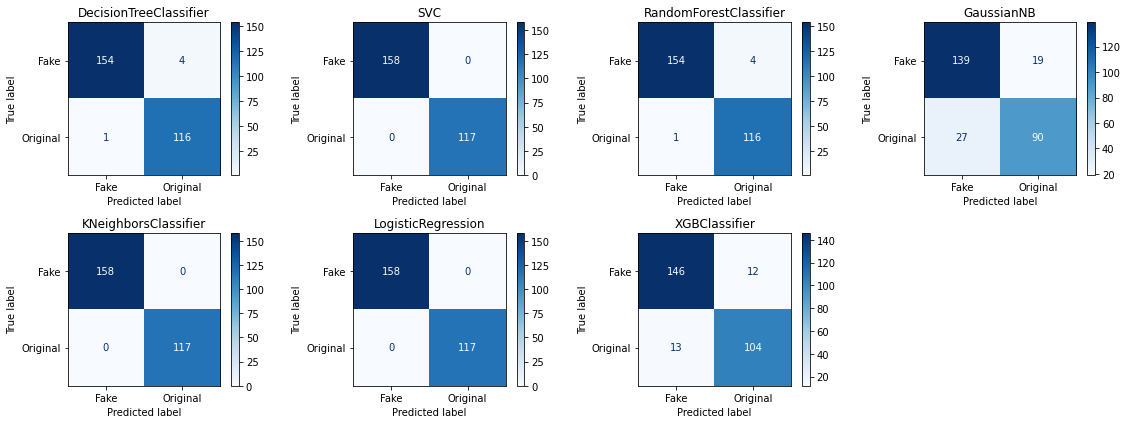

In [ ]:
Scores().display_confusion_matrix()

# ROC AUC Curve of all models

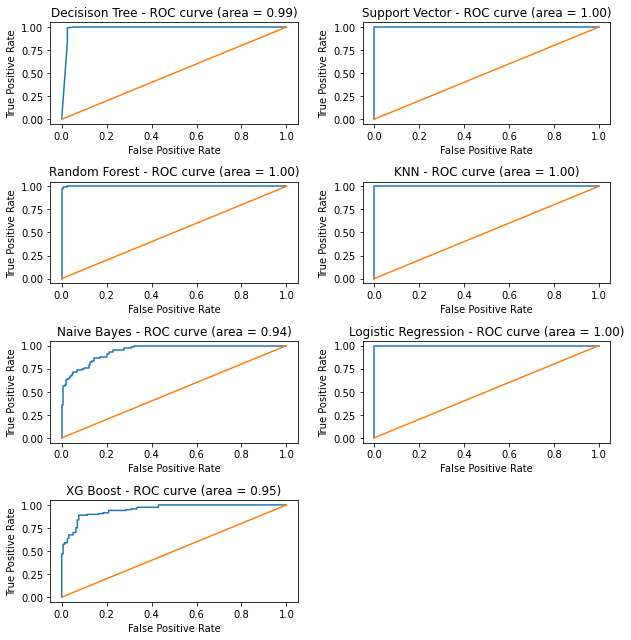

In [ ]:
Scores().roc_auc_curve()

As per my analysis SVM performed as the best model with 100% accuracy score in all metrices. Follwoing graphs shows the decision boundaries for better visualization of boundaries.

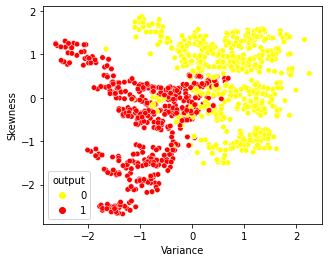

In [ ]:
plt.figure(figsize=(5, 4))
# Two feature space ploting
sns.scatterplot(x=X_train.iloc[:, 0], 
                y=X_train.iloc[:, 1], 
                hue=y_train, 
                s=30, palette=['yellow','red']);

In [ ]:
x_plot = pd.concat([X_train, y_train], axis=1, join='inner')
x_plot.to_csv('scatterplot_merged.csv')

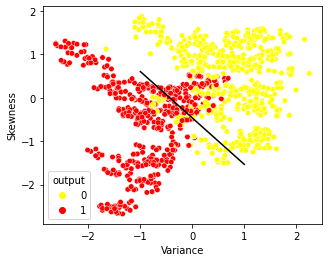

In [ ]:
plt.figure(figsize=(5, 4))
# Two feature space ploting
sns.scatterplot(x=X_train.iloc[:, 0], 
                y=X_train.iloc[:, 1], 
                hue=y_train, 
                s=30, palette=['yellow','red']);
# Formula for hyperplane
w_value = svc_model.coef_[0]
b_value = svc_model.intercept_[0]
x_points = np.linspace(-1, 1)
y_points = -(w_value[0] / w_value[1]) * x_points - b_value / w_value[1]
plt.plot(x_points, y_points, c='black');

Get support vector indices

In [ ]:
svm_indices = svc_model.support_
svm_per_class = svc_model.n_support_

3-D graph of SVM with hyper plane

In [ ]:
def plot(x,y,cvar,Scale,model):
    if Scale == 'Yes': ## if scaling is needed or not
        x=model.fit_transform(x)
    else:
        pass
    Z = lambda X,Y: (-model.intercept_[0]-model.coef_[0][0]*X-model.coef_[0][1]*Y) / model.coef_[0][2] 
    trace_1 = go.Mesh3d(x = x[:,0], y = x[:,1], z = Z(x[:,0],x[:,1]))
    trace_2 = go.Scatter3d(x=x[:,0], y=x[:,1], z=x[:,2], mode='markers',
                        marker = dict(size = 12,color = y,colorscale = 'Viridis'))
    trace_data=[trace_1,trace_2]
    fig = go.Figure(data=trace_data,layout={})
    fig.show()

In [271]:
p_value = df.iloc[:,[0,1,2]].values
q_value = (df.output!=0).astype(np.float64)

In [272]:
plot(p_value,q_value,0.1,'yes',svc_model)